\\\ Project : Predicting PUBG Match Outcomes Using Player Statistics \\\

Objective:

Step 1 : Loading Necessary Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')    # filtering unwanted warnings

Step 2 : Loading Dataset

In [6]:
df = pd.read_csv('pubg.csv')

Step 3 : Performing Exploratory Data Analysis (EDA)

In [8]:
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (4446966, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [10]:
missing = df.isnull().sum()
print(missing[missing > 0])

winPlacePerc    1
dtype: int64


<Axes: xlabel='winPlacePerc', ylabel='Count'>

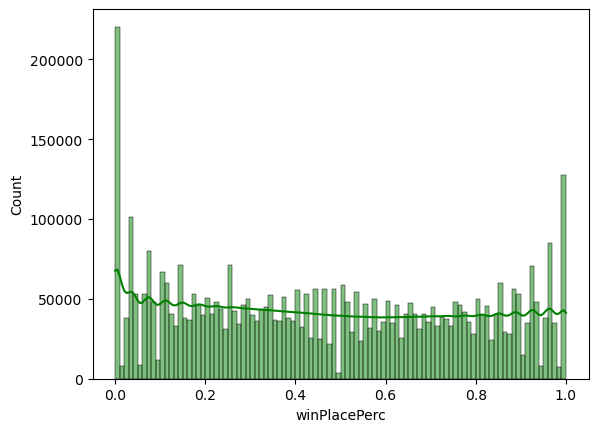

In [11]:
sns.histplot(df['winPlacePerc'], kde=True, bins=100, color='green')

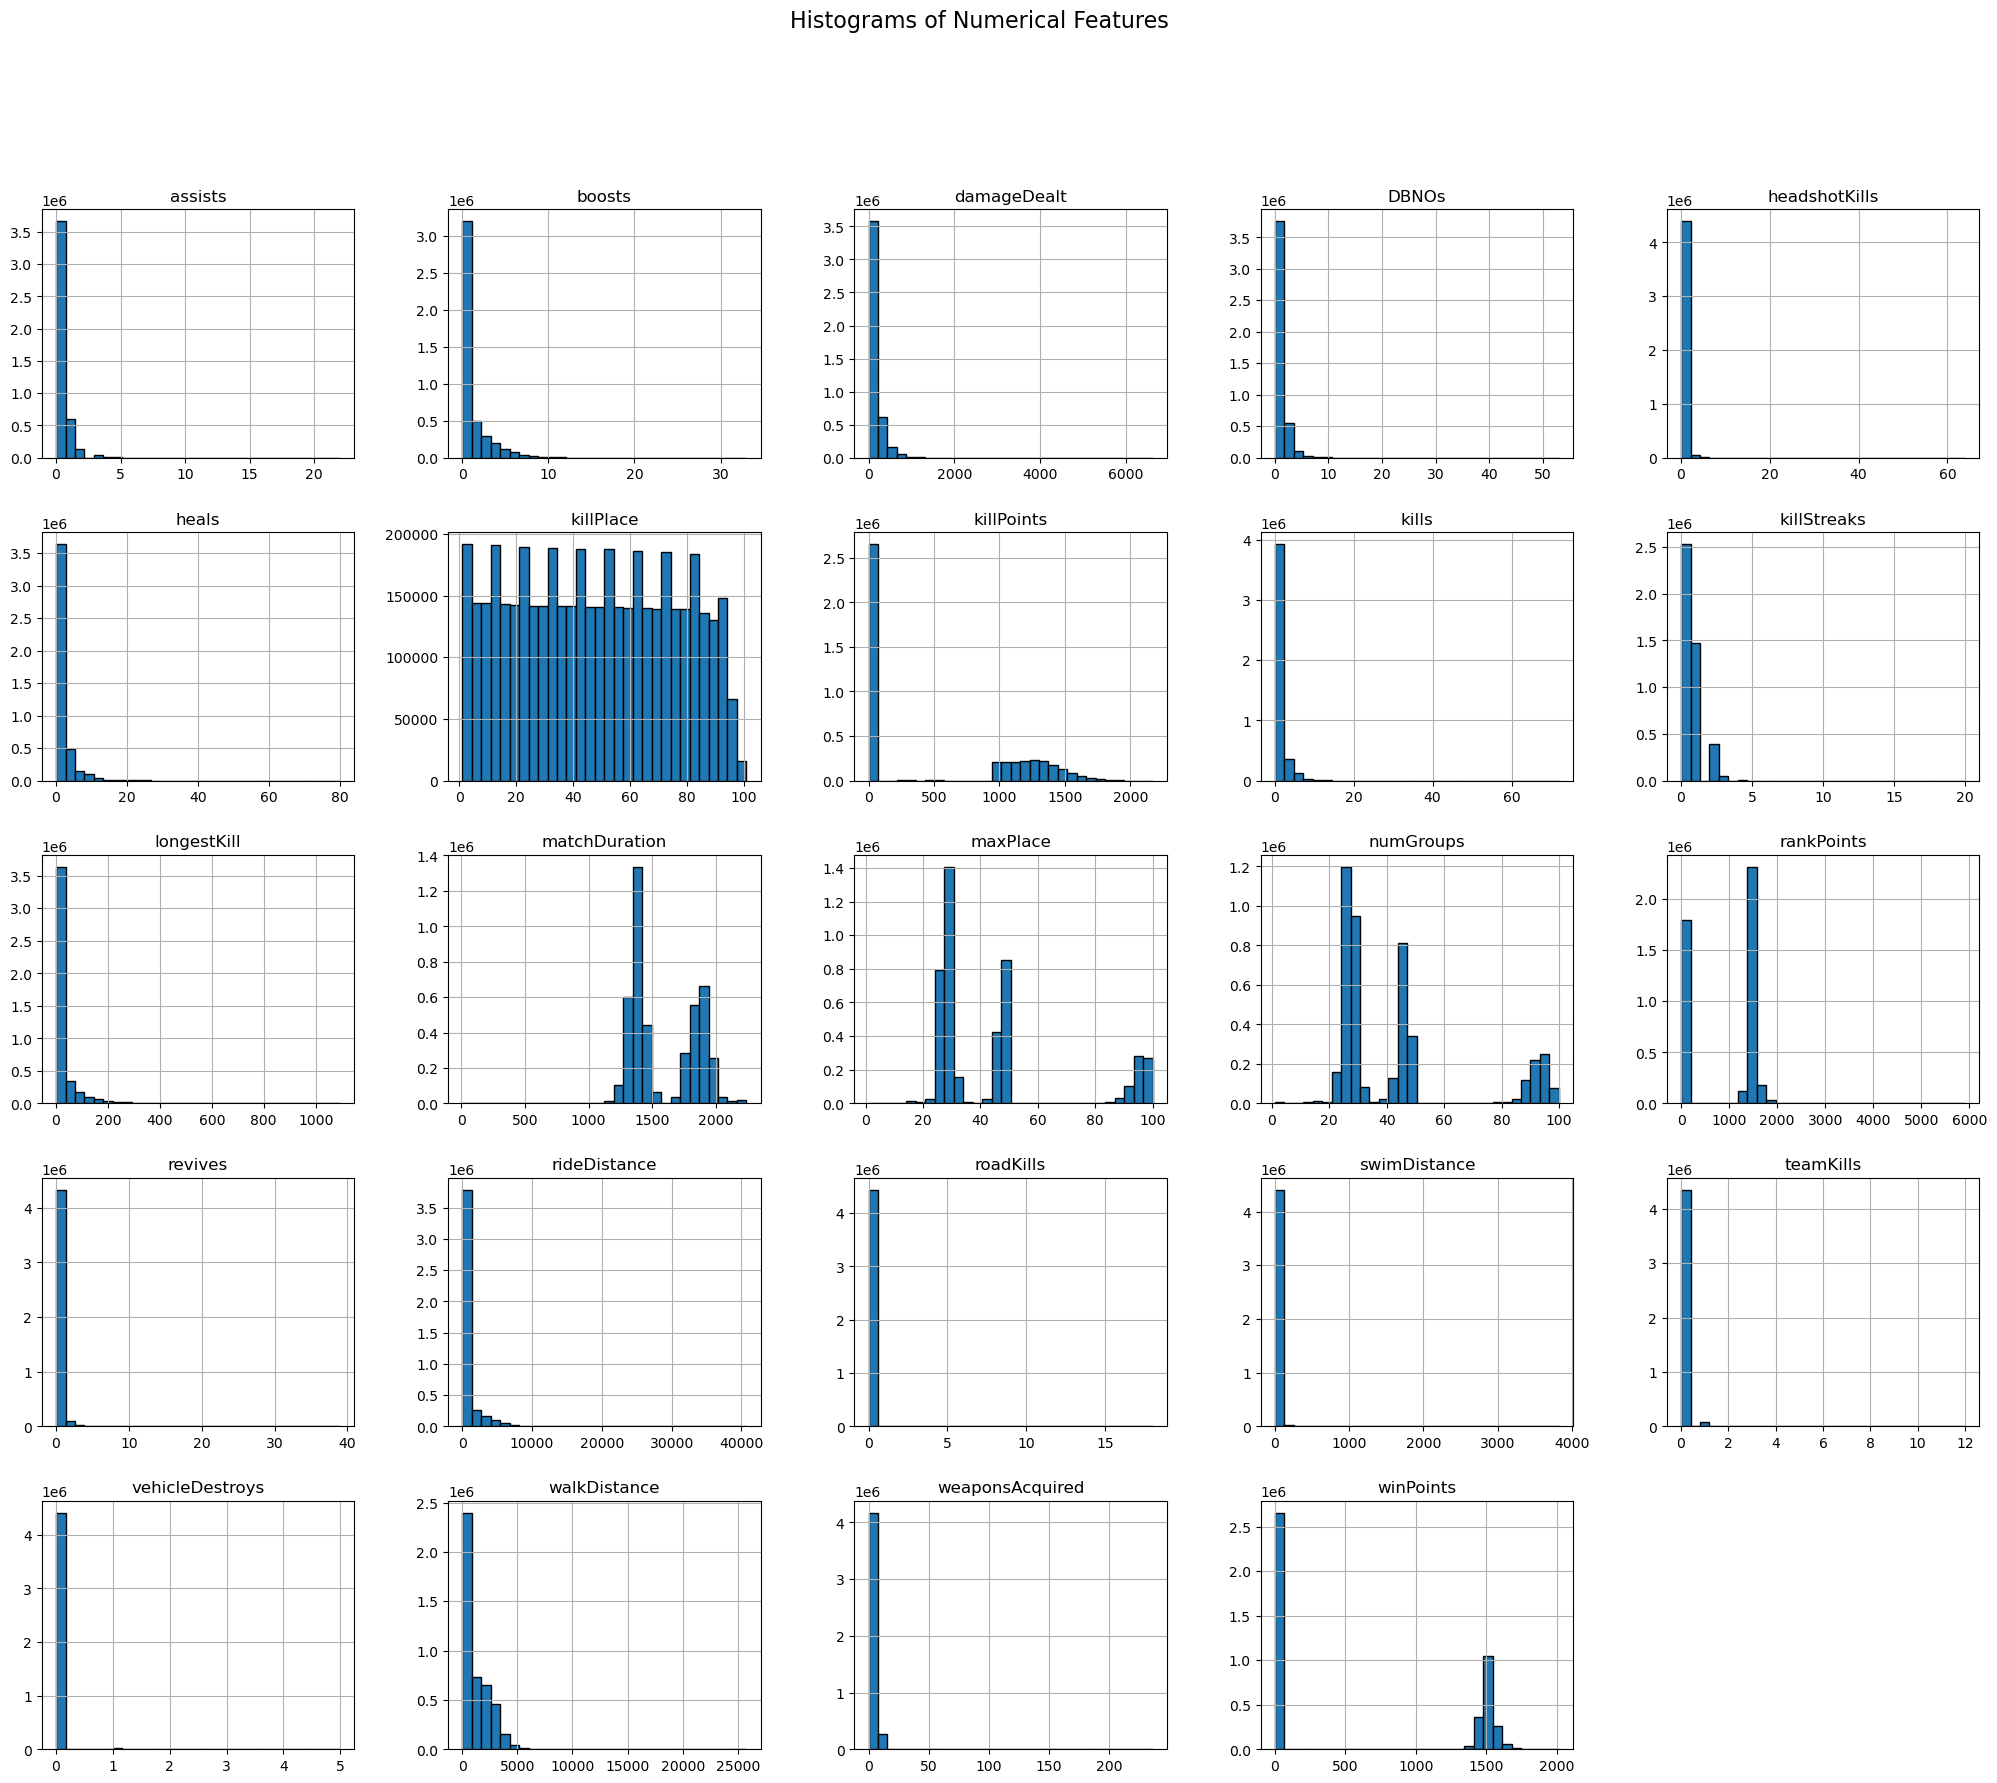

In [12]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('winPlacePerc')

df[num_cols].hist(figsize=(25, 20), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

In [13]:
df.drop(['Id', 'groupId', 'matchId'], axis=1, inplace=True)

In [14]:
df = df.loc[:, df.nunique() > 1]   # Remove columns with only one unique value
df.drop_duplicates(inplace=True)

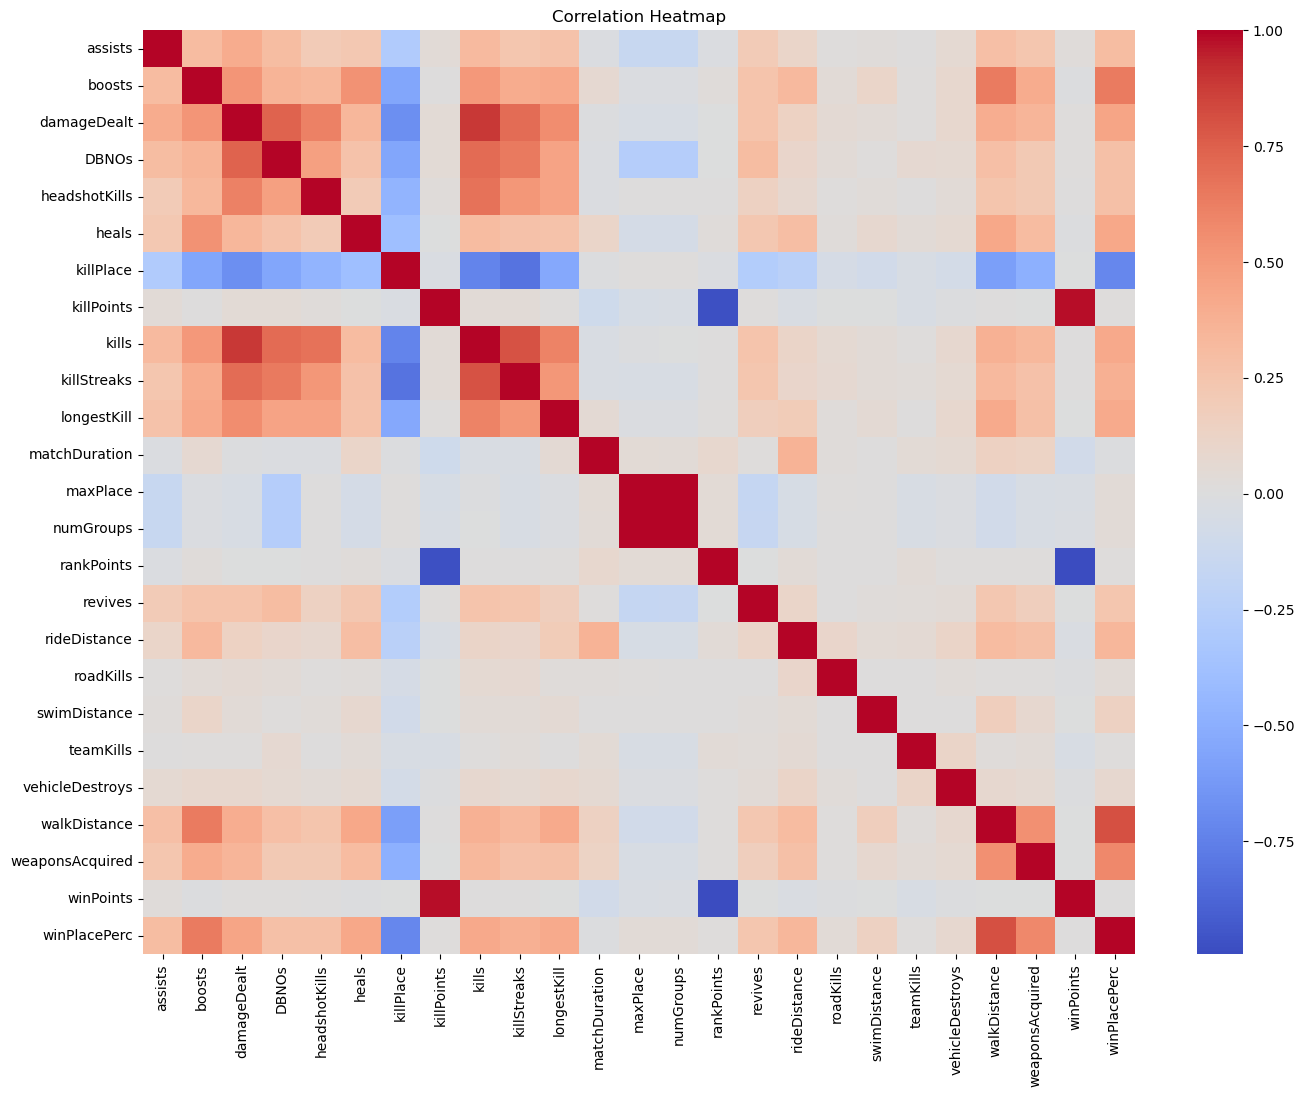

In [15]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(16, 12))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap')
plt.show()

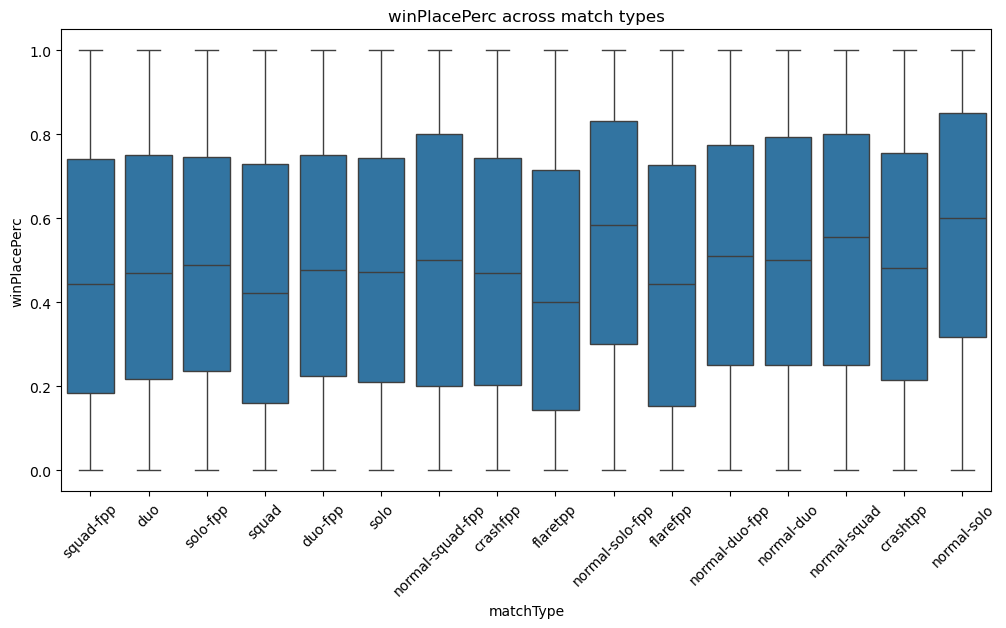

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='matchType', y='winPlacePerc', data=df)
plt.xticks(rotation=45)
plt.title("winPlacePerc across match types")
plt.show()

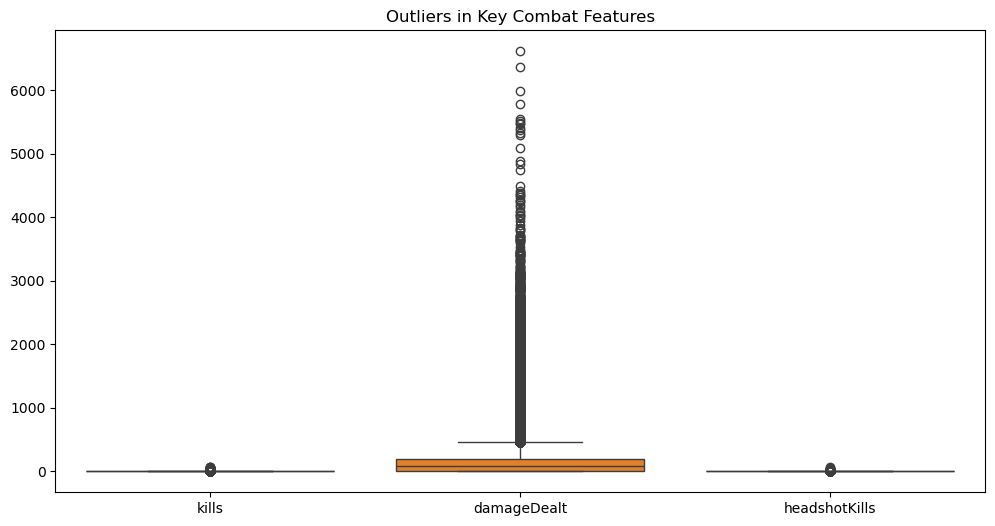

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['kills', 'damageDealt', 'headshotKills']])
plt.title("Outliers in Key Combat Features")
plt.show()

Step 4 : Feature Engineering 

In [19]:
df['totalDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']
df['healthItems'] = df['heals'] + df['boosts']
df['totalCombat'] = df['kills'] + df['assists'] + df['DBNOs'] + df['headshotKills']
df.drop(['walkDistance', 'rideDistance', 'swimDistance', 'kills', 'assists', 'DBNOs', 'headshotKills', 'rankPoints', 'roadKills', 'vehicleDestroys', 'teamKills', 'revives'], axis=1, inplace=True)

In [20]:
df = df.sample(frac=0.1, random_state=42).reset_index(drop=True)

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
df['pointsPCA'] = pca.fit_transform(df[['killPoints', 'winPoints']])

In [22]:
df.drop(['killPoints', 'winPoints'], axis=1, inplace=True)

In [23]:
Q1 = df['damageDealt'].quantile(0.25)
Q3 = df['damageDealt'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df['damageDealt'] = df['damageDealt'].clip(upper=upper_bound)

In [24]:
df.head()

,boosts,damageDealt,heals,killPlace,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,weaponsAcquired,winPlacePerc,totalDistance,healthItems,totalCombat,pointsPCA
0,0,0.00,0,72,0,0.0,1939,duo,47,46,4,0.2826,446.00,0,0,-788.964438
1,0,100.00,0,93,0,0.0,1971,squad-fpp,27,26,2,0.0000,181.20,0,1,1231.128927
2,0,0.00,0,93,0,0.0,1763,squad-fpp,30,28,0,0.0000,28.75,0,0,-788.964438
3,2,156.80,5,45,0,0.0,1876,squad-fpp,29,28,7,0.8571,10475.00,7,2,-788.964438
4,0,28.59,0,75,0,0.0,1294,squad,30,29,2,0.3448,597.50,0,0,1002.128041


In [25]:
df.describe()

,boosts,damageDealt,heals,killPlace,killStreaks,longestKill,matchDuration,maxPlace,numGroups,weaponsAcquired,winPlacePerc,totalDistance,healthItems,totalCombat,pointsPCA
count,444546.000000,444546.000000,444546.000000,444546.000000,444546.000000,444546.00000,444546.000000,444546.000000,444546.000000,444546.000000,444546.000000,444546.000000,444546.000000,444546.000000,4.445460e+05
mean,1.107150,120.909796,1.369750,47.630207,0.544351,22.91373,1579.359164,44.527957,43.032708,3.662692,0.472796,1765.607880,2.476900,2.042329,1.090381e-13
std,1.713454,133.258837,2.677563,27.451326,0.711404,50.73625,258.876411,23.829782,23.281441,2.462935,0.307218,2181.338677,3.875593,3.173119,9.658167e+02
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,152.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.889644e+02
25%,0.000000,0.000000,0.000000,24.000000,0.000000,0.00000,1367.000000,28.000000,27.000000,2.000000,0.200000,159.500000,0.000000,0.000000,-7.889644e+02
50%,0.000000,84.540000,0.000000,47.000000,0.000000,0.00000,1438.000000,30.000000,30.000000,3.000000,0.458300,791.500000,1.000000,1.000000,-7.889644e+02
75%,2.000000,186.000000,2.000000,71.000000,1.000000,21.30000,1851.000000,49.000000,47.000000,5.000000,0.740700,2726.000000,4.000000,3.000000,1.102108e+03
max,24.000000,465.000000,59.000000,100.000000,10.000000,1002.00000,2237.000000,100.000000,100.000000,167.000000,1.000000,33419.000000,64.000000,143.000000,2.004984e+03


In [26]:
from sklearn.preprocessing import OneHotEncoder

match_type_col = df[['matchType']]  # must be 2D for encoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
match_type_encoded = encoder.fit_transform(match_type_col)
match_type_feature_names = encoder.get_feature_names_out(['matchType'])
encoded_df = pd.DataFrame(match_type_encoded, columns=match_type_feature_names, index=df.index)

df.drop('matchType', axis=1, inplace=True)
df = pd.concat([df, encoded_df], axis=1)


In [27]:
df.head()

,boosts,damageDealt,heals,killPlace,killStreaks,longestKill,matchDuration,maxPlace,numGroups,weaponsAcquired,...,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0.00,0,72,0,0.0,1939,47,46,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,100.00,0,93,0,0.0,1971,27,26,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.00,0,93,0,0.0,1763,30,28,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,156.80,5,45,0,0.0,1876,29,28,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,28.59,0,75,0,0.0,1294,30,29,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
X = df.drop('winPlacePerc', axis=1)
y = df['winPlacePerc']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Drop any remaining string/object columns
X_train = X_train.select_dtypes(exclude=['object'])
X_test = X_test.select_dtypes(exclude=['object'])

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

lr_rmse = mean_squared_error(y_test, lr_preds, squared=False)
lr_r2 = r2_score(y_test, lr_preds)

print("Linear Regression:")
print(f"RMSE: {lr_rmse:.4f}, R2: {lr_r2:.4f}")


Linear Regression:
RMSE: 0.1377, R2: 0.7989


In [33]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_test_scaled)

rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
rf_r2 = r2_score(y_test, rf_preds)

print("Random Forest:")
print(f"RMSE: {rf_rmse:.4f}, R2: {rf_r2:.4f}")

Random Forest:
RMSE: 0.0915, R2: 0.9112


In [34]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_test_scaled)

xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)
xgb_r2 = r2_score(y_test, xgb_preds)

print("XGBoost:")
print(f"RMSE: {xgb_rmse:.4f}, R2: {xgb_r2:.4f}")


XGBoost:
RMSE: 0.0908, R2: 0.9127


In [35]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train_scaled, y_train)
lgb_preds = lgb_model.predict(X_test_scaled)

lgb_rmse = mean_squared_error(y_test, lgb_preds, squared=False)
lgb_r2 = r2_score(y_test, lgb_preds)

print("LightGBM:")
print(f"RMSE: {lgb_rmse:.4f}, R2: {lgb_r2:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 355636, number of used features: 29
[LightGBM] [Info] Start training from score 0.472980
LightGBM:
RMSE: 0.0901, R2: 0.9140


In [36]:
# Compare results of all models
import pandas as pd

results = [
    ("Linear Regression", lr_rmse, lr_r2),
    ("Random Forest", rf_rmse, rf_r2),
    ("XGBoost", xgb_rmse, xgb_r2),
    ("LightGBM", lgb_rmse, lgb_r2)
]

result_df = pd.DataFrame(results, columns=["Model", "RMSE", "R2 Score"])
print("Model Performance Summary:")
print(result_df.sort_values(by="R2 Score", ascending=False))


Model Performance Summary:
               Model      RMSE  R2 Score
3           LightGBM  0.090052  0.914027
2            XGBoost  0.090755  0.912679
1      Random Forest  0.091543  0.911155
0  Linear Regression  0.137714  0.798934


In [37]:
best_model_name = result_df.sort_values(by='R2 Score', ascending=False).iloc[0]['Model']
print(f"\nBest Performing Model: {best_model_name}")


model_dict = {
    "Linear Regression": lr_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "LightGBM": lgb_model
}

best_model = model_dict[best_model_name]
X = X.drop(columns=['Id', 'groupId', 'matchId'], errors='ignore')

best_model.fit(X, y)



Best Performing Model: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1806
[LightGBM] [Info] Number of data points in the train set: 444546, number of used features: 29
[LightGBM] [Info] Start training from score 0.472796


LGBMRegressor(random_state=42)

In [38]:
import joblib

joblib.dump(best_model, "pubg_best_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved.")


Model and scaler saved.


In [84]:
# Example dummy input (replace with real values)
sample = X.iloc[5:10]

sample_scaled = scaler.transform(sample)

prediction = best_model.predict(sample_scaled)
print(f"Predicted winPlacePerc: {prediction[0]:.4f}")


Predicted winPlacePerc: 0.3612
